## Seleção de fatures

### O que é?

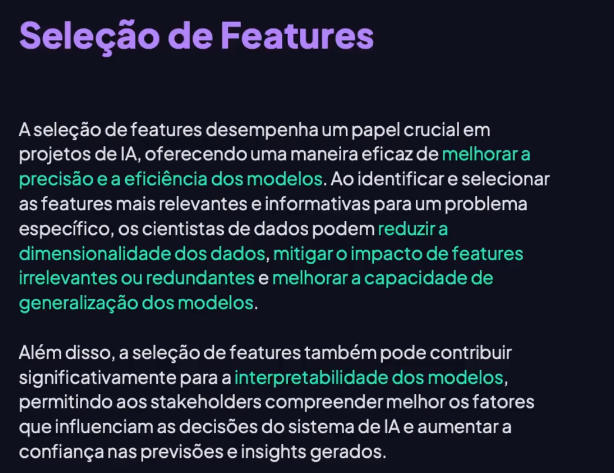

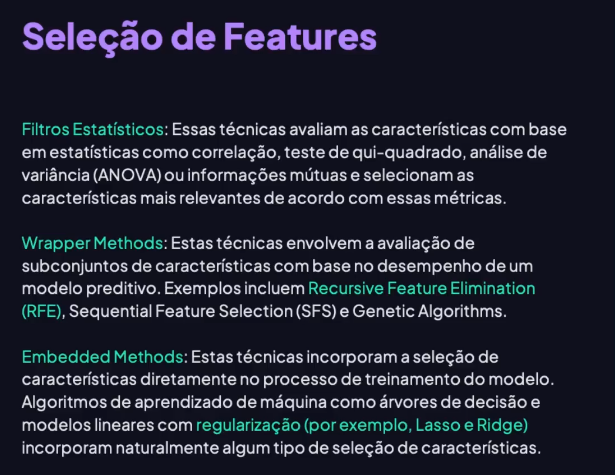

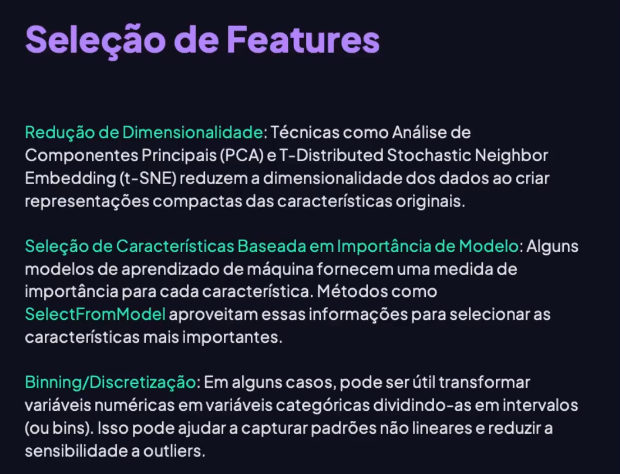

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, f1_score

In [2]:
df_colesterol = pd.read_csv('./dataset/colesterol.csv')

In [3]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


### Transformação dos dados

In [4]:
# Transformar variaveis categóricas em numéricas
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

df_colesterol = pd.get_dummies(df_colesterol, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

df_colesterol.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
5,68,66.8,170,185.31,False,False,True,False,True,False,False,True,False
6,60,117.3,181,289.33,True,False,False,False,False,True,False,True,False
7,35,86.9,174,216.48,False,False,False,True,False,True,False,False,True
8,62,81.3,166,235.30,False,False,False,True,True,False,False,True,False
9,44,32.7,165,97.79,False,False,True,False,False,True,True,False,False


### Treinar modelo de regressão linear múltipla com RFE

In [ ]:
# Separar X e y
X = df_colesterol.drop(columns=['Colesterol'])
y = df_colesterol['Colesterol']

In [ ]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [ ]:
# Treinar o modelo com o RFE
# RFE = Recursive Feature Elimination
# O RFE é um método de seleção de features que funciona da seguinte forma:
# 1. Treina um modelo com todas as features
# 2. Calcula a importância de cada feature
# 3. Remove a feature menos importante
# 4. Repete os passos 1 a 3 até que reste apenas o número desejado de features
# O RFE pode ser usado com qualquer modelo que tenha um atributo "coef_" ou "feature_importances_"
# Neste caso, vamos usar o RFE com um modelo de regressão linear
# O RFE vai selecionar as 2 melhores features para o modelo
rfe_method = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe_method.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [ ]:
# Verificar quais features foram selecionadas
selected_features = X_train.columns[rfe_method.get_support()]
print("Features selecionadas pelo RFE:", selected_features)

Features selecionadas pelo RFE: Index(['Peso', 'Altura', 'Grupo Sanguíneo_AB', 'Fumante_Não', 'Fumante_Sim',
       'Nível de Atividade_Alto'],
      dtype='object')


In [ ]:
# Ranking de features
def show_ranking(methods_fs, X_train):
  # Obter o ranking de Features
  ranking = rfe_method.ranking_
  
  # Obter o nome das features
  features_names = X_train.columns.to_list()
  
  # Criar um DataFrame com o ranking de features
  df_ranking = pd.DataFrame({'Feature': features_names, 'Ranking': ranking})
  
	# Ordenar o DataFrame pelo ranking
  df_ranking = df_ranking.sort_values(by='Ranking', ascending=True)
  
	# Exibir o DataFrame
  print(df_ranking)

In [ ]:
show_ranking(rfe_method, X_train)

                        Feature  Ranking
1                          Peso        1
2                        Altura        1
4            Grupo Sanguíneo_AB        1
7                   Fumante_Não        1
8                   Fumante_Sim        1
9       Nível de Atividade_Alto        1
5             Grupo Sanguíneo_B        2
3             Grupo Sanguíneo_A        3
11  Nível de Atividade_Moderado        4
10     Nível de Atividade_Baixo        5
6             Grupo Sanguíneo_O        6
0                         Idade        7


In [ ]:
def show_performance(model, X_test, y_test):
  # Fazer previsões com o modelo
	y_pred = model.predict(X_test)
	
	# Avaliar o desempenho do modelo
	return root_mean_squared_error(y_test, y_pred)

In [ ]:
# Performance regressão com RFE
show_performance(rfe_method, X_test, y_test)

np.float64(8.948793762634496)

In [5]:
# Separar X e y
X = df_colesterol.drop(columns=['Colesterol'])
y = df_colesterol['Colesterol']

In [6]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [18]:
# Treinar o modelo com o RFE
# RFE = Recursive Feature Elimination
# O RFE é um método de seleção de features que funciona da seguinte forma:
# 1. Treina um modelo com todas as features
# 2. Calcula a importância de cada feature
# 3. Remove a feature menos importante
# 4. Repete os passos 1 a 3 até que reste apenas o número desejado de features
# O RFE pode ser usado com qualquer modelo que tenha um atributo "coef_" ou "feature_importances_"
# Neste caso, vamos usar o RFE com um modelo de regressão linear
# O RFE vai selecionar as 2 melhores features para o modelo
rfe_method = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe_method.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [19]:
# Verificar quais features foram selecionadas
selected_features = X_train.columns[rfe_method.get_support()]
print("Features selecionadas pelo RFE:", selected_features)

Features selecionadas pelo RFE: Index(['Peso', 'Altura', 'Grupo Sanguíneo_AB', 'Fumante_Não', 'Fumante_Sim',
       'Nível de Atividade_Alto'],
      dtype='object')


In [9]:
# Ranking de features
def show_ranking(methods_fs, X_train):
  # Obter o ranking de Features
  ranking = rfe_method.ranking_
  
  # Obter o nome das features
  features_names = X_train.columns.to_list()
  
  # Criar um DataFrame com o ranking de features
  df_ranking = pd.DataFrame({'Feature': features_names, 'Ranking': ranking})
  
	# Ordenar o DataFrame pelo ranking
  df_ranking = df_ranking.sort_values(by='Ranking', ascending=True)
  
	# Exibir o DataFrame
  print(df_ranking)

In [20]:
show_ranking(rfe_method, X_train)

                        Feature  Ranking
1                          Peso        1
2                        Altura        1
4            Grupo Sanguíneo_AB        1
7                   Fumante_Não        1
8                   Fumante_Sim        1
9       Nível de Atividade_Alto        1
5             Grupo Sanguíneo_B        2
3             Grupo Sanguíneo_A        3
11  Nível de Atividade_Moderado        4
10     Nível de Atividade_Baixo        5
6             Grupo Sanguíneo_O        6
0                         Idade        7


In [11]:
def show_performance(model, X_test, y_test):
  # Fazer previsões com o modelo
	y_pred = model.predict(X_test)
	
	# Avaliar o desempenho do modelo
	return root_mean_squared_error(y_test, y_pred)

In [21]:
# Performance regressão com RFE
show_performance(rfe_method, X_test, y_test)

np.float64(8.948793762634496)

### Treinar modelo de regressão linear múltipla sem RFE

In [13]:
# Treinar o modelo de regressão sem o RFE
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
# Performance regressão sem RFE
show_performance(model_reg, X_test, y_test)

np.float64(9.017674671581464)

### Treinar modelo com de regressão linear múltipla com RFECV

In [22]:
# Criar modelo
rfe_method_cv = RFECV(estimator=LinearRegression(), min_features_to_select=6, cv=5)
rfe_method_cv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), min_features_to_select=6)

In [23]:
# Mostrar performance do modelo com RFECV
show_performance(rfe_method_cv, X_test, y_test)

np.float64(9.022882331203348)

In [26]:
# Features selecionadas pelo RFECV
X_train.columns[(rfe_method_cv.get_support())]

Index(['Peso', 'Altura', 'Grupo Sanguíneo_A', 'Grupo Sanguíneo_AB',
       'Grupo Sanguíneo_B', 'Fumante_Não', 'Fumante_Sim',
       'Nível de Atividade_Alto', 'Nível de Atividade_Baixo',
       'Nível de Atividade_Moderado'],
      dtype='object')

In [25]:
# Qtd de features selecionadas pelo RFECV
rfe_method_cv.n_features_

np.int64(10)

In [24]:
# Ranking de features
show_ranking(rfe_method_cv, X_train)

                        Feature  Ranking
1                          Peso        1
2                        Altura        1
4            Grupo Sanguíneo_AB        1
7                   Fumante_Não        1
8                   Fumante_Sim        1
9       Nível de Atividade_Alto        1
5             Grupo Sanguíneo_B        2
3             Grupo Sanguíneo_A        3
11  Nível de Atividade_Moderado        4
10     Nível de Atividade_Baixo        5
6             Grupo Sanguíneo_O        6
0                         Idade        7


### Treinar modelo com de regressão linear múltipla com SelectFromModel

In [35]:
# Criar modelo
sfm_method = SelectFromModel(estimator=model_reg, max_features=4, threshold=0.5)
sfm_method.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(), max_features=4, threshold=0.5)

In [36]:
# Features selecionadas pelo RFECV
X_train.columns[(sfm_method.get_support())]

Index(['Peso', 'Altura', 'Grupo Sanguíneo_AB', 'Nível de Atividade_Alto'], dtype='object')

In [37]:
# Treinar o modelo com o SFM
X_train_ajustado_reg = sfm_method.transform(X_train)
X_test_ajustado_reg = sfm_method.transform(X_test)
model_reg.fit(X_train_ajustado_reg, y_train)

LinearRegression()

In [38]:
# Performance regressão com SFM
show_performance(model_reg, X_test_ajustado_reg, y_test)

np.float64(9.024674426990275)

### Carregamento dados modelo de classificação

In [40]:
df_fruit_quality = pd.read_csv('./dataset/fruit_quality.csv')

In [41]:
df_fruit_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [42]:
df_fruit_quality.drop(columns=['A_id'], axis=1, inplace=True)
df_fruit_quality.Quality = (df_fruit_quality.Quality == 'good').astype(int)
df_fruit_quality

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Treinar modelo de regressão logística com RFE

In [56]:
# Separar X e y
X = df_fruit_quality.drop(columns=['Quality'])
y = df_fruit_quality['Quality']

In [57]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [72]:
# Treinar o modelo com o RFE
rfe_method = RFE(estimator=LogisticRegression(), n_features_to_select=6)
rfe_method.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=6)

In [73]:
# Verificar quais features foram selecionadas
X_train.columns[rfe_method.get_support()]

Index(['Size', 'Weight', 'Sweetness', 'Juiciness', 'Ripeness', 'Acidity'], dtype='object')

In [65]:
show_ranking(rfe_method, X_train)

       Feature  Ranking
0         Size        1
1       Weight        1
2    Sweetness        1
4    Juiciness        1
6      Acidity        2
5     Ripeness        3
3  Crunchiness        4


In [66]:
def classification_performance(model, X_test, y_test):
  # Fazer previsões com o modelo
	y_pred = model.predict(X_test)
	
	# Avaliar o desempenho do modelo
	return f1_score(y_test, y_pred)

In [74]:
classification_performance(rfe_method, X_test, y_test)

np.float64(0.7767634854771784)

### Treinar modelo de regressão logística sem RFE

In [70]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [71]:
classification_performance(model_lr, X_test, y_test)

np.float64(0.7787903893951947)

### Treinar modelo com de regressão logística com RFECV

In [77]:
# Criar modelo
rfe_method_cv = RFECV(estimator=LogisticRegression(), min_features_to_select=4, cv=5, scoring='f1_weighted')
rfe_method_cv.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(), min_features_to_select=4,
      scoring='f1_weighted')

In [78]:
classification_performance(rfe_method_cv, X_test, y_test)

np.float64(0.7767634854771784)

### Treinar modelo com de regressão logística com SelectFromModel

In [92]:
# Criar modelo
sfm_method = SelectFromModel(estimator=model_lr, max_features=5, threshold=0.1)
sfm_method.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(), max_features=5, threshold=0.1)

In [93]:
# Features selecionadas pelo RFECV
X_train.columns[(sfm_method.get_support())]

Index(['Size', 'Weight', 'Sweetness', 'Juiciness', 'Acidity'], dtype='object')

In [94]:
# Treinar o modelo com o SFM
X_train_ajustado_class = sfm_method.transform(X_train)
X_test_ajustado_class = sfm_method.transform(X_test)
model_lr.fit(X_train_ajustado_class, y_train)

LogisticRegression()

In [95]:
# Performance regressão com SFM
classification_performance(model_lr, X_test_ajustado_class, y_test)

np.float64(0.7738193869096934)